In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("C:/Users/hi/Desktop/Data_Analytics/heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# . age
# . sex
# . chest pain type (4 values)
   #. value 0: typical angina
   #. value 1: atypical angina
   #. value 2: non anginal pain
   #. value 3: asymptomatic

# . trestbps: resting blood pressure(in mm Hg on admission to the hospital)
# . chol: serum cholestrol in mg
# . fbs: (fasting blood sugar>120mg)(1=true, 0=false)
# . restecg: resting electrocardiographic results
   #. value 0: normal
   #. value 1: having ST-T wave abnormality

# . thalach: maximum heart rate achieved
# . exang: exercise induced angina
# . oldpeak: ST depression induced by exercise relate to rest



# Finding shape of dataset

In [6]:
data.shape

(1025, 14)

In [7]:
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 1025
Number of columns 14


# Get information about dataset like total number of rows, total number of columns, datatype of each column and memory requirement

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# check null values in the dataset

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# check for duplicate data and drop them

In [10]:
data_dup = data.duplicated().any()
print(data_dup)

True


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(302, 14)

# Getting overall statistics about the dataset

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Draw correlation matrix

<AxesSubplot:>

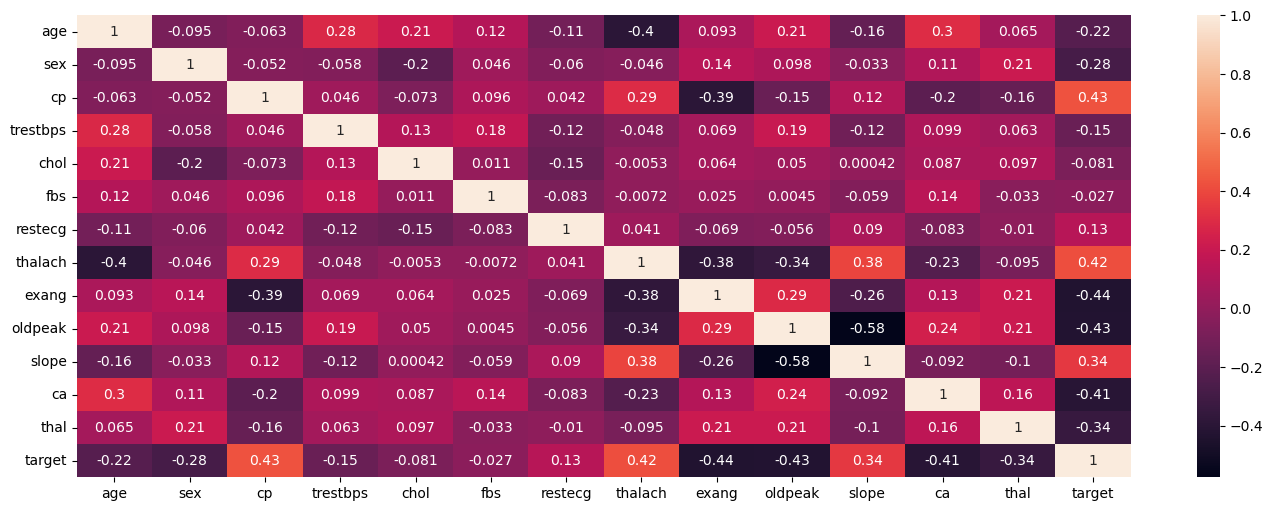

In [14]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

# How many people have heart disease, and how many don't have heart disease in this dataset?

In [15]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

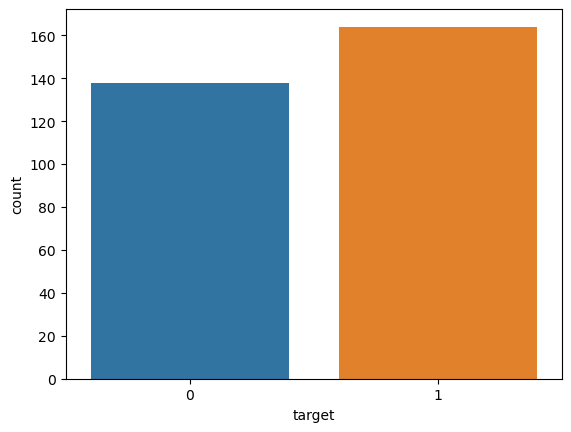

In [17]:
sns.countplot(data['target'])

# check chest pain type

In [18]:
# chest pain type (4 values):
# value 0: typical angina
# value 1: atypical angina
# value 2: non anginal pain
# value 3: asymptomatic

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


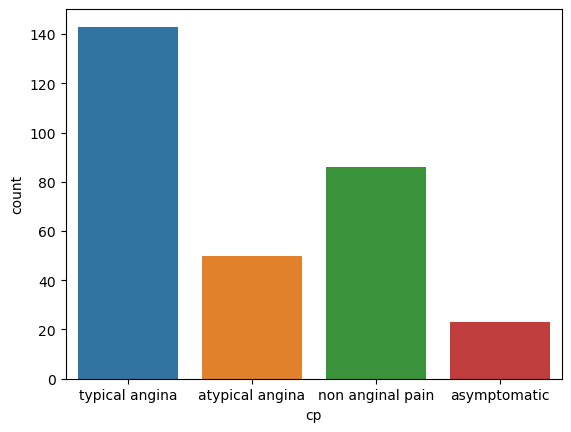

In [19]:
sns.countplot(data['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non anginal pain","asymptomatic"])
plt.show()

# Show the chest pain distribution as per target variable.

In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

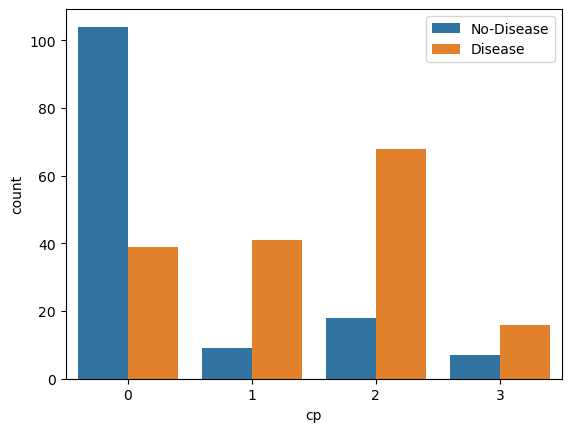

In [21]:
sns.countplot(x="cp",hue="target",data=data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

# Show fasting blood sugar distribution according to target variable

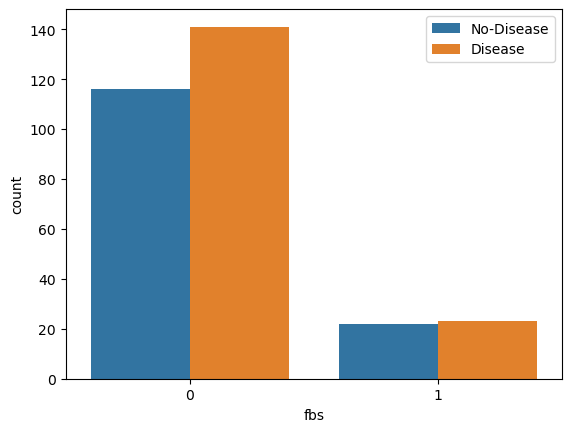

In [22]:
sns.countplot(x="fbs",hue="target",data=data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

# Check resting blood pressure distribution

In [23]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

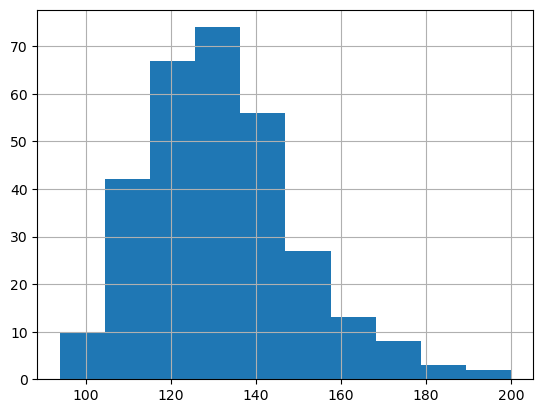

In [24]:
  data['trestbps'].hist()

# Show distribution of serum cholestrol

In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

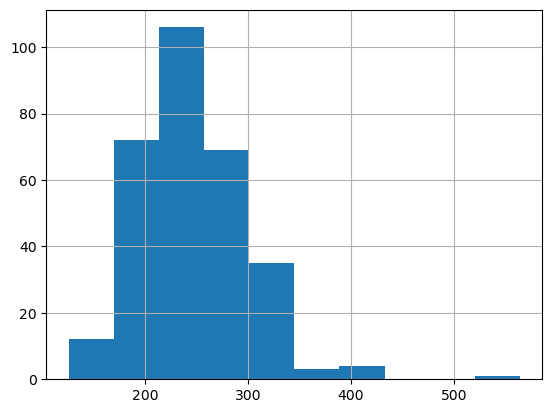

In [26]:
data['chol'].hist()